# Intent-Based Chatbot Project

#### Developed by BHARATH T

## Introduction To Chatbots:

#### What is a chatbot?
A chatbot is a computer program that simulates human conversation with an end user. Not all chatbots are equipped with artificial intelligence (AI), but modern chatbots increasingly use conversational AI techniques such as natural language processing (NLP) to understand user questions and automate responses to them.

#### Benefits of chatbots
The ability of AI chatbots to accurately process natural human language and automate personalised service in return creates clear benefits for businesses and customers alike.

#### How Chatbots Work:
##### 1. Input Processing:
When a user interacts with a chatbot, their input (text or voice) is processed using NLP techniques to identify key words and understand the intent behind the query. 
##### 2. Matching with Knowledge Base:
The chatbot then matches the user's input with pre-defined patterns or data in its knowledge base to retrieve relevant information or responses. 
##### 3. Response Generation:
Depending on the chatbot type, the response could be generated using pre-defined rules, a decision tree, or machine learning algorithms to formulate a natural-sounding reply. 

#### Challenges of Chatbots:
##### 1. Context Understanding:
Difficulty in interpreting the full context of a conversation, leading to misinterpretations or irrelevant responses, especially with complex or ambiguous questions. 
##### 2. Natural Language Variation:
Handling slang, dialects, and different ways of phrasing the same question. 
##### 3. Handling Unanticipated Queries:
Inability to respond appropriately to questions outside the chatbot's programmed knowledge base. 
##### 4. User Frustration:
May cause frustration if the chatbot fails to understand user intent or provides incorrect information.

#### Types of Chatbots:
##### 1. Rule-Based Chatbots:
Operate on pre-defined rules and keywords, suitable for simple, repetitive tasks with limited conversational complexity. 
Menu-Driven Chatbots:
Provide users with a list of options to choose from, guiding them through a structured conversation flow. 
##### 2. AI-Powered Chatbots (Machine Learning):
Utilise machine learning algorithms to learn from interactions and progressively improve their ability to understand and respond to complex queries. 
##### 3. Hybrid Chatbots:
Combine elements of rule-based and AI-powered approaches, allowing for both structured responses and more natural conversations depending on the situation.

### Problem Statement
The objective of this project is to develop an intent-based chatbot capable of understanding and responding to user inputs using Natural Language Processing (NLP) techniques. The chatbot will classify user inputs into predefined intents using a Logistic Regression model. Based on the predicted intents, the chatbot will generate dynamic and relevant responses to provide an interactive experience.
To ensure seamless communication, the chatbot will feature a Streamlit-based user interface that enables real-time user input and response generation. The system will utilize tokenization and TF-IDF vectorization techniques for text preprocessing and feature extraction.
This project serves as a foundational step in building conversational agents with potential applications in customer support, virtual assistants, and knowledge-based systems.


### Project Objectives
The main objectives of this project are as follows:
#### 1.	Develop an NLP-Based Chatbot:
Create a chatbot capable of classifying user inputs into predefined categories (intents) using Natural Language Processing techniques.
#### 2.	Implement Text Preprocessing:
Use tokenization and TF-IDF vectorization to preprocess and convert textual data into numerical formats suitable for machine learning.
#### 3.	Train a Logistic Regression Model:
Build and train a Logistic Regression model to classify user inputs into intents with high accuracy and reliability.
#### 4.	Design an Interactive User Interface:
Use the Streamlit framework to create a user-friendly chatbot interface. The interface will allow users to input messages and view real-time responses.
#### 5.	Dynamically Generate Responses:
Based on the predicted intent, the chatbot will generate appropriate responses by selecting from a list of predefined answers corresponding to each intent.
#### 6.	Ensure Model Performance and Efficiency:
Optimize the model to deliver quick and accurate predictions, ensuring smooth user interaction and response delivery.
#### 7.	Provide a Seamless User Experience:
Develop a system where users can interact with the chatbot effortlessly, enabling quick information retrieval and responses.


## Tool

#### Jupyter Notebook

### Libraries:
##### json
##### pandas
##### matplot
##### seaborn
##### sklearn (scikit-learn)

### Languages:
##### Python
##### Artificial Intelligence
##### Machine Learning

## Cleaning The Dataset

In [16]:
# Import necessary libraries
import json
import pandas as pd

Import JSON and Pandas libraries 
JSON: used to handle the JSON data and JSON files.
Pandas: used to manipulate the data.

In [18]:
# Load the dataset
file_path = 'intents.json'
with open(file_path, 'r') as file:
    data = json.load(file)

The json.load function reads the JSON data from the specified file_path and loads it.

In [19]:
# Convert the JSON data to a DataFrame for easier manipulation
tags = []
patterns = []
responses = []

for intent in data:
    tag = intent.get('tag', None)
    for pattern in intent.get('patterns', []):
        tags.append(tag)
        patterns.append(pattern)
        responses.append("|".join(intent.get('responses', [])))  # Join responses as a single column

##### 1. The code iterates through each intent in the JSON data.
##### 2. For each intent, it extracts the tag, patterns, and responses.
##### 3. The patterns and responses are appended to their respective lists.
##### 4. The responses are joined into a single string using the | delimiter.
##### 5. A pandas DataFrame is created with the extracted data, having columns for Tag, Pattern, and Response.

In [20]:
# Create DataFrame
df = pd.DataFrame({'Tag': tags, 'Pattern': patterns, 'Response': responses})

In [21]:
# Display initial data overview
print("Initial Data Overview:")
print(df.head())

Initial Data Overview:
        Tag      Pattern                                           Response
0  greeting           Hi  Hi there|Hello|Hey|I'm fine, thank you|Nothing...
1  greeting        Hello  Hi there|Hello|Hey|I'm fine, thank you|Nothing...
2  greeting          Hey  Hi there|Hello|Hey|I'm fine, thank you|Nothing...
3  greeting  How are you  Hi there|Hello|Hey|I'm fine, thank you|Nothing...
4  greeting    What's up  Hi there|Hello|Hey|I'm fine, thank you|Nothing...


The df.head() method displays the first few rows of the DataFrame to get a quick look at the data.

In [22]:
# Cleaning Steps:
# 1. Remove duplicates
df.drop_duplicates(inplace=True)

The df.drop_duplicates() method removes any duplicate rows in the DataFrame.

In [23]:
# 2. Check for missing values
print("\nMissing Values Before Cleanup:")
print(df.isnull().sum())


Missing Values Before Cleanup:
Tag         0
Pattern     0
Response    0
dtype: int64


The df.isnull().sum() method calculates the number of missing values in each column.

In [24]:
# Drop rows where Tag or Pattern is missing (required fields)
df.dropna(subset=['Tag', 'Pattern'], inplace=True)

Rows with missing values in the Tag or Pattern columns are dropped as these are essential fields.

In [25]:
# Check for cleaned DataFrame
print("\nData After Cleaning:")
print(df.head())


Data After Cleaning:
        Tag      Pattern                                           Response
0  greeting           Hi  Hi there|Hello|Hey|I'm fine, thank you|Nothing...
1  greeting        Hello  Hi there|Hello|Hey|I'm fine, thank you|Nothing...
2  greeting          Hey  Hi there|Hello|Hey|I'm fine, thank you|Nothing...
3  greeting  How are you  Hi there|Hello|Hey|I'm fine, thank you|Nothing...
4  greeting    What's up  Hi there|Hello|Hey|I'm fine, thank you|Nothing...


In [27]:
# Optionally save the cleaned data back to JSON
# Reorganize cleaned data to the original structure
cleaned_data = []
for tag in df['Tag'].unique():
    filtered = df[df['Tag'] == tag]
    patterns = filtered['Pattern'].tolist()
    responses = list(set("|".join(filtered['Response']).split('|')))  # Get unique responses

    cleaned_data.append({
        'tag': tag,
        'patterns': patterns,
        'responses': responses
    })

### Reorganizing the Data:
The cleaned DataFrame is grouped by Tag.
For each Tag, the unique patterns and responses are extracted.
The reorganized data is formatted into a list of dictionaries, each representing an intent.

#### Saving to JSON:
The json.dump() function writes the cleaned data to a new JSON file, cleaned_intents.json.

In [28]:
# Save to a new JSON file
output_path = 'cleaned_intents.json'
with open(output_path, 'w') as file:
    json.dump(cleaned_data, file, indent=4)

print(f"\nCleaned data saved to {output_path}.")


Cleaned data saved to cleaned_intents.json.


## Exploratory Data Analysis

Dataset Overview:

        Tag  Patterns_Count  Responses_Count
0  greeting               5                5
1   goodbye               4                3
2    thanks               4                3
3     about               4                3
4      help               4                3

Summary Statistics:

       Patterns_Count  Responses_Count
count      273.000000       273.000000
mean         3.058608         2.076923
std          0.458026         0.360681
min          2.000000         2.000000
25%          3.000000         2.000000
50%          3.000000         2.000000
75%          3.000000         2.000000
max          6.000000         5.000000

Missing Values:

Tag                0
Patterns_Count     0
Responses_Count    0
dtype: int64


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


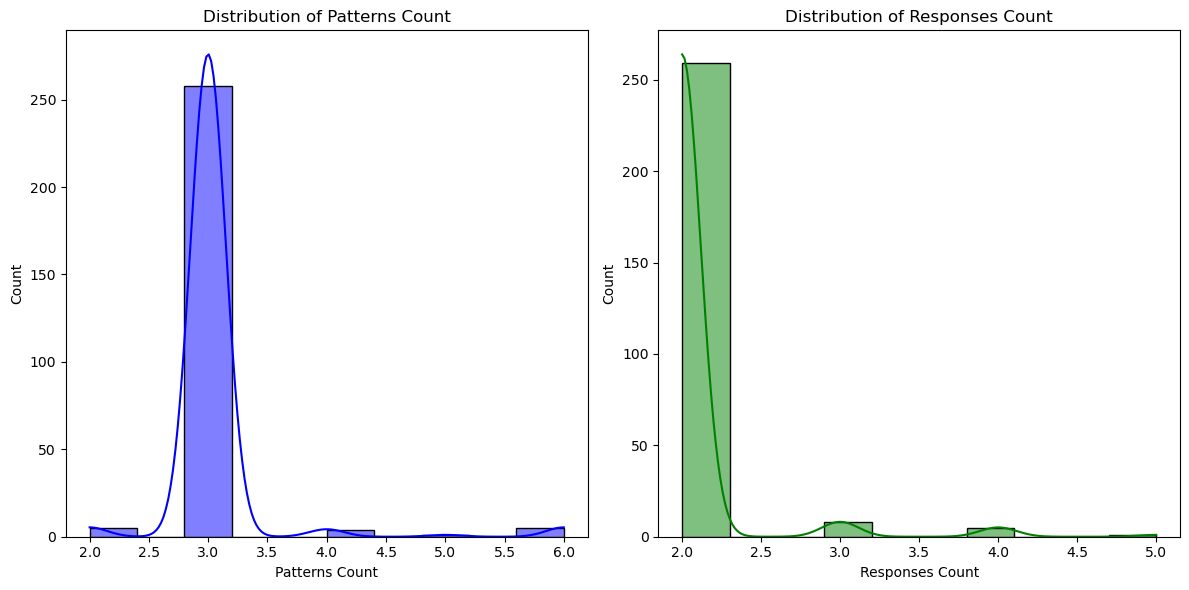

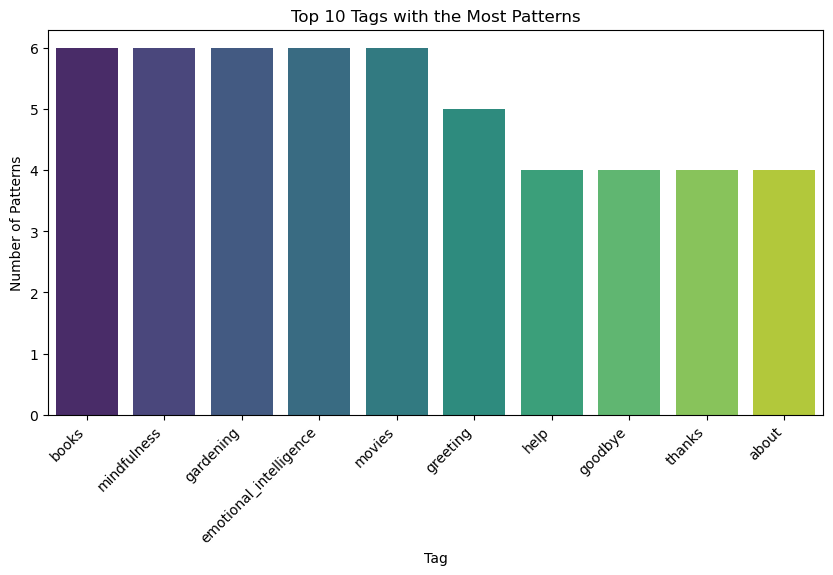

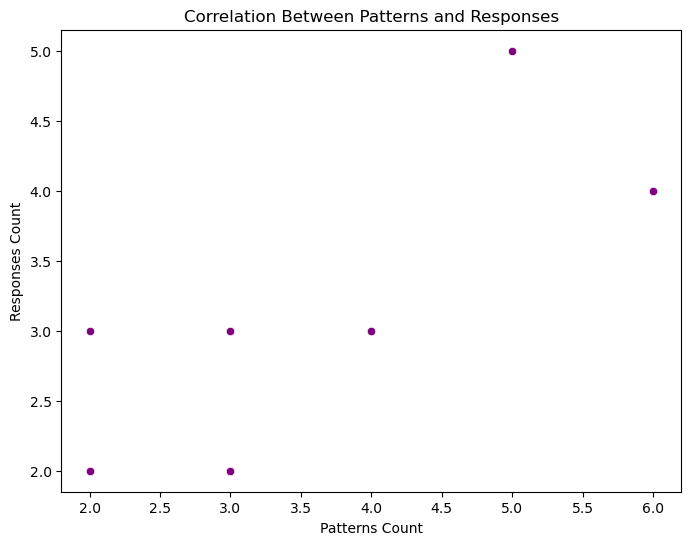

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON file
file_path = 'cleaned_intents.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert JSON data to DataFrame for analysis
tags = []
patterns_count = []
responses_count = []

for intent in data:
    tags.append(intent.get('tag', None))
    patterns_count.append(len(intent.get('patterns', [])))
    responses_count.append(len(intent.get('responses', [])))

# Create a DataFrame
df = pd.DataFrame({
    'Tag': tags,
    'Patterns_Count': patterns_count,
    'Responses_Count': responses_count
})

# Overview of the data
print("Dataset Overview:\n")
print(df.head())

# Summary statistics
print("\nSummary Statistics:\n")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Distribution of Patterns and Responses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Patterns_Count'], kde=True, color='blue', bins=10)
plt.title('Distribution of Patterns Count')
plt.xlabel('Patterns Count')

plt.subplot(1, 2, 2)
sns.histplot(df['Responses_Count'], kde=True, color='green', bins=10)
plt.title('Distribution of Responses Count')
plt.xlabel('Responses Count')

plt.tight_layout()
plt.show()

# Top 10 tags with the most patterns
top_patterns = df.sort_values(by='Patterns_Count', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_patterns['Tag'], y=top_patterns['Patterns_Count'], palette='viridis')
plt.title('Top 10 Tags with the Most Patterns')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Patterns')
plt.xlabel('Tag')
plt.show()

# Correlation between Patterns and Responses
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Patterns_Count', y='Responses_Count', data=df, color='purple')
plt.title('Correlation Between Patterns and Responses')
plt.xlabel('Patterns Count')
plt.ylabel('Responses Count')
plt.show()

#### 1. Imports:

 json: Used for loading data from the JSON file.
 pandas as pd: Enables creating and manipulating DataFrames for data analysis.
 matplotlib.pyplot as plt: Provides functionalities for creating visualizations (plots).
 seaborn as sns: A high-level library built on top of Matplotlib, offering a more user-friendly interface for creating statistical graphics.

#### 2. Loading Data:
The code specifies the file path ('cleaned_intents.json') containing the cleaned chatbot intent data. It opens the file in read mode ('r') and uses json.load() to load the data into a Python object (data).

#### 3. Data Preparation for Analysis:
 Three empty lists are created: tags, patterns_count, and responses_count.
 The code iterates through each intent in the loaded data (data).
 It extracts the tag (intent identifier) and stores it in the tags list.
 It counts the number of patterns (len(intent.get('patterns', []))) associated with the intent and adds it to the patterns_count list. Similarly, the number of responses (len(intent.get('responses', []))) is calculated and stored in the responses_count list.

#### 4. Creating a DataFrame:

 A DataFrame (df) is created using pandas.DataFrame().
 It consists of three columns:
 Tag: Stores the extracted intent identifiers from the JSON data.
 Patterns_Count: Holds the number of patterns for each intent.
 Responses_Count: Contains the number of responses associated with each intent.

#### 5. Dataset Overview and Summary Statistics:

The code prints the first few rows of the DataFrame (df.head()) to provide a glimpse of the data.
It then utilizes df.describe() to display summary statistics like mean, standard deviation, minimum, and maximum values for each numerical column (i.e., Patterns_Count and Responses_Count).

#### 6. Checking for Missing Values:

The code uses df.isnull().sum() to check for missing values in any column. Ideally, there should be no missing values after cleaning the data.

#### 7. Distribution of Patterns and Responses:

 This section utilizes Matplotlib and Seaborn to create visualizations:
 plt.figure(figsize=(12, 6)): Creates a figure with a specific size (width=12, height=6).
 plt.subplot(1, 2, 1): Defines a subplot layout with 1 row and 2 columns. This creates two subplots on the same figure.
 sns.histplot(df['Patterns_Count'], kde=True, color='blue', bins=10): Creates a histogram for the Patterns_Count column in the DataFrame.
 kde=True: Adds a kernel density estimation line to the plot.
 color='blue': Sets the color of the histogram bars to blue.
 bins=10: Specifies the number of bins used to create the histogram.
 Similar code with sns.histplot is used to create a histogram for the Responses_Count column in the second subplot.
 Titles and labels are added using plt.title and plt.xlabel functions.
 plt.tight_layout(): Adjusts the spacing between subplots for better readability.
 plt.show(): Displays the created figure with both histograms.

#### 8. Top 10 Tags with the Most Patterns:

The code sorts the DataFrame (df) by the Patterns_Count column in descending order using df.sort_values().
It then selects the top 10 rows using head(10).
This results in a DataFrame (top_patterns) containing the top 10 tags with the highest number of associated patterns.

##### A bar chart is created using sns.barplot:
x=top_patterns['Tag']: Sets the x-axis labels using the Tag column from the top_patterns DataFrame.
y=top_patterns['Patterns_Count']: Sets the y-axis values using the Patterns_Count column.
palette='viridis': Selects a color palette for the bars.

## Training, Testing and Validating the datasets

In [5]:
# Import necessary libraries
import json
from sklearn.model_selection import train_test_split

# Load the JSON file
file_path = 'cleaned_intents.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Prepare the dataset
patterns = []
responses = []
tags = []

for intent in data:
    tag = intent.get('tag')
    for pattern in intent.get('patterns', []):
        patterns.append(pattern)
        responses.append(intent.get('responses'))
        tags.append(tag)

# Create a consolidated dataset
dataset = list(zip(patterns, tags))

# Split into training, validation, and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

# Save the splits to JSON files
def save_split(data, file_name):
    split_data = [{"pattern": item[0], "tag": item[1]} for item in data]
    with open(file_name, 'w') as file:
        json.dump(split_data, file, indent=4)

save_split(train_data, 'train_data.json')
save_split(val_data, 'val_data.json')
save_split(test_data, 'test_data.json')

print("Data splits saved as 'train_data.json', 'val_data.json', and 'test_data.json'.")


Training set size: 534
Validation set size: 134
Test set size: 167
Data splits saved as 'train_data.json', 'val_data.json', and 'test_data.json'.


#### 1. Importing Necessary Libraries:

json: Used for handling JSON data, specifically loading and saving JSON files.
sklearn.model_selection: Provides tools for splitting datasets into training, validation, and testing sets.

#### 2. Loading the JSON Data:

The code loads the cleaned chatbot intent data from the specified file_path using json.load().

#### 3. Preparing the Dataset:

Three empty lists are created: patterns, responses, and tags.
The code iterates through each intent in the loaded data:
It extracts the tag (intent identifier).
For each pattern associated with the intent, it adds the pattern to the patterns list, the corresponding response to the responses list, and the tag to the tags list.

#### 4. Creating a Consolidated Dataset:

The zip() function is used to combine patterns and tags into a list of tuples, where each tuple represents a pattern-tag pair. This creates a consolidated dataset.

#### 5. Splitting into Training, Validation, and Test Sets:

The train_test_split() function from sklearn.model_selection is used to split the dataset into training and testing sets.
The1 test_size=0.2 parameter specifies that 20% of the data will be allocated to the test set.   
1.
github.com
github.com
The random_state=42 parameter ensures reproducibility of the split.
The training set is further split into training and validation sets using the same function with the same parameters.

#### 6. Printing Dataset Sizes:

The code prints the number of samples in each split to provide an overview of the data distribution.

#### 7. Saving the Splits to JSON Files:

The save_split() function is defined to save a given split to a JSON file:
It takes a split (a list of tuples) and a file name as input.
It converts each tuple into a dictionary with pattern and tag keys.
The list of dictionaries is written to the specified file using json.dump().
The train_data, val_data, and test_data splits are saved to their respective JSON files using the save_split() function.
Why Splitting the Dataset is Important:

Training Set: Used to train the model, learning patterns from the data.
Validation Set: Used to tune hyperparameters and evaluate the model's performance during training.
Test Set: Used to assess the final model's performance on unseen data.
By splitting the dataset into these sets, we can ensure that the model is trained on a diverse range of data, evaluated on a separate validation set to avoid overfitting, and finally tested on a completely unseen dataset to assess its real-world performance.